Data Set : 

In this Dataset : 

The independent variables are Voltage (V) detected by the sensor, Height (H) of the Sensor from ground and Soil Type (S)

The Dependent or response Variable is the Type of Mine (M) corresponding to 1 out of 5 possible mine types detected.

The Normalized Data is available in the UCI dataset (https://archive.ics.uci.edu/dataset/763/land+mines-1). 

It is converted to a CSV file manually and read throught the code. 

There are no missing values in the data set.

In [24]:
# Import necessary libraries - common libraries include pandas, numpy, matplotlib, and sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import math
import scipy.stats
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import seaborn as sns

In [25]:
# reading the Landmines data file
mines=pd.read_csv('mines.dat', sep='\s+')
print(mines)

            V         H    S  M
0    0.338157  0.000000  0.0  1
1    0.320241  0.181818  0.0  1
2    0.287009  0.272727  0.0  1
3    0.256284  0.454545  0.0  1
4    0.262840  0.545455  0.0  1
..        ...       ...  ... ..
333  0.323262  0.909091  0.4  5
334  0.444108  0.181818  1.0  5
335  0.353474  0.454545  1.0  5
336  0.362537  0.727273  1.0  5
337  0.314199  1.000000  1.0  5

[338 rows x 4 columns]


Summary Statistics and Missing Values Check

In [7]:
# Calculate summary statistics
print(mines.describe())
print(mines.isnull().sum())

                V           H           S           M
count  338.000000  338.000000  338.000000  338.000000
mean     0.430634    0.508876    0.503550    2.952663
std      0.195819    0.306043    0.344244    1.419703
min      0.197734    0.000000    0.000000    1.000000
25%      0.309737    0.272727    0.200000    2.000000
50%      0.359516    0.545455    0.600000    3.000000
75%      0.482628    0.727273    0.800000    4.000000
max      0.999999    1.000000    1.000000    5.000000
V    0
H    0
S    0
M    0
dtype: int64


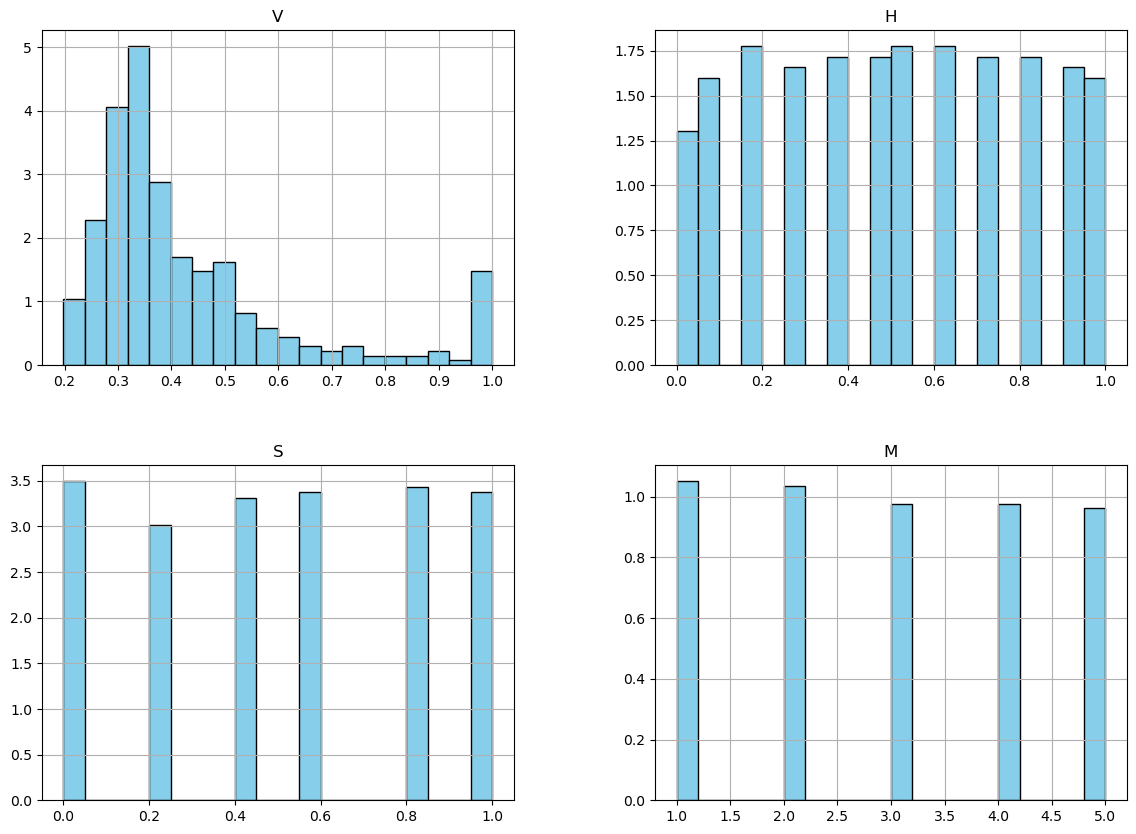

In [35]:
# Histograms
mines.hist(bins=20, figsize=(14, 10),density=True,color='skyblue', edgecolor='black')
plt.show()

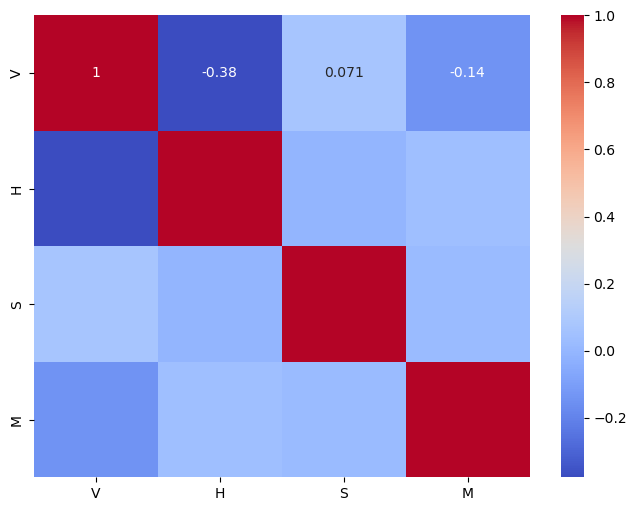

In [27]:
# Correlation matrix
corr_matrix = mines.corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

C:\Users\nitin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nitin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nitin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


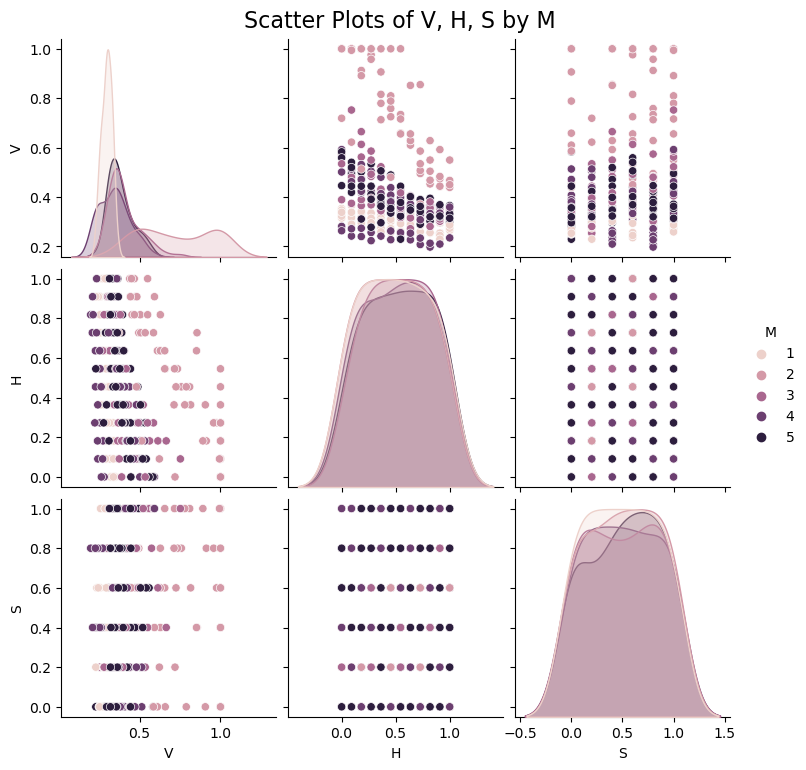

In [30]:
# Corrected pairplot without KDE to avoid errors
sns.pairplot(mines, hue='M')
plt.suptitle('Scatter Plots of V, H, S by M', fontsize=16, y=1.02)
plt.show()

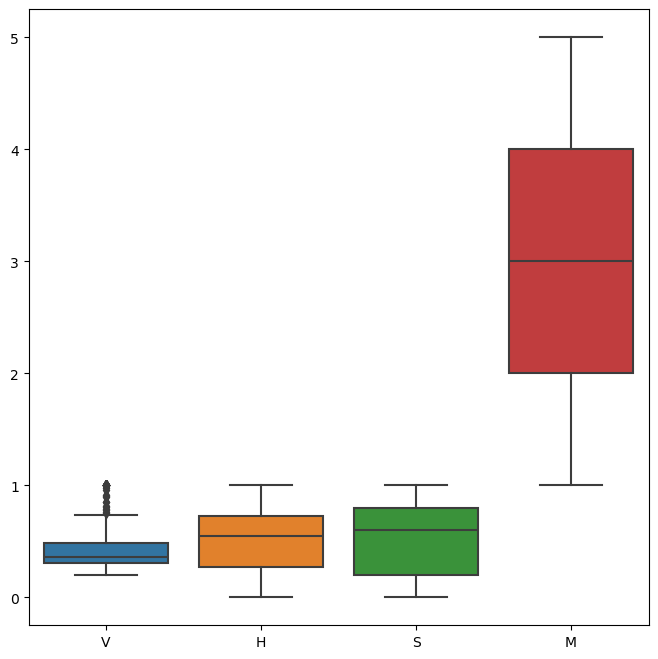

In [36]:
# Box plots
plt.figure(figsize=(8, 8))
sns.boxplot(data=mines)
plt.show()

In [29]:
# Since Soil Type is a Normalised catagorical Variable, Lets split the data for each soil type (0,0.2,0.4,0.6,0.8,1) 
#corresponding to soil type 1,2,3,4,5,6

# Split the data into separate datasets based on the value of S
s_values = mines['S'].unique()
datasets = {}
for s in s_values:
    datasets[s] = mines[mines['S'] == s]

# Print the separate datasets
#for s, data in datasets.items():
#    print(f"Dataset for S = {s}:")
#    print(data)
#    print()
mines_s1=datasets[0]
mines_s2=datasets[0.2]
mines_s3=datasets[0.4]
mines_s4=datasets[0.6]
mines_s5=datasets[0.8]
mines_s6=datasets[1]

In [37]:
# mean and standard deviation of V and H , useful later for Sampling distributions.
Vavg=mines['V'].mean()
Vstd=mines['V'].std()
print('The Mean Voltage : ',round(Vavg,3),' and the Standard Deviation of Voltage',round(Vstd,3))

Havg=mines['H'].mean()
Hstd=mines['H'].std()
print('The Mean Height  : ',round(Havg,3),' and the Standard Deviation of Height ',round(Hstd,3))

The Mean Voltage :  0.431  and the Standard Deviation of Voltage 0.196
The Mean Height  :  0.509  and the Standard Deviation of Height  0.306


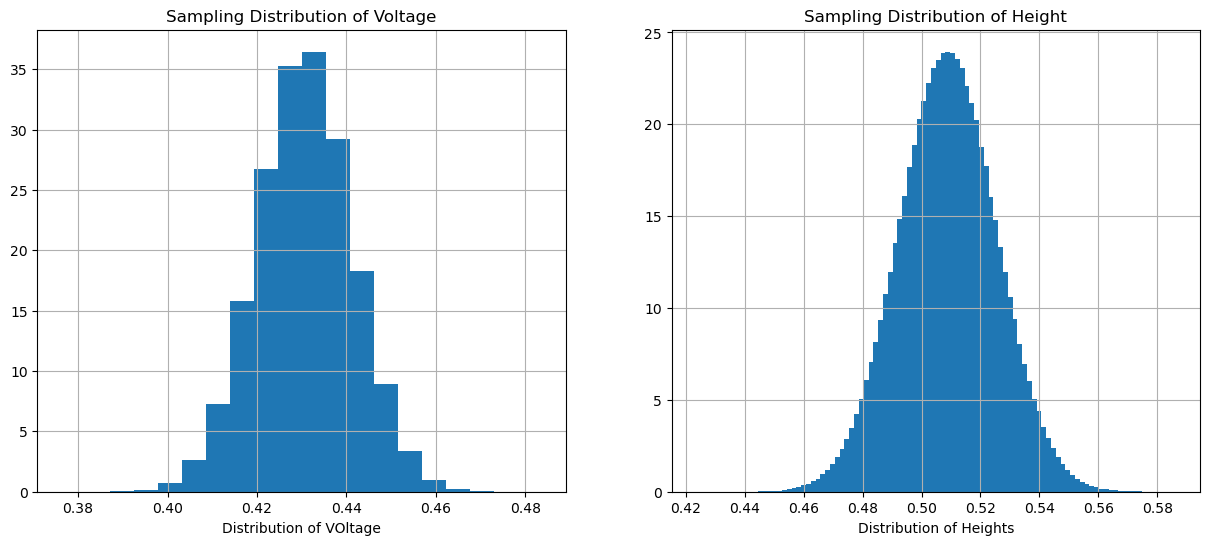

In [50]:
#Sampling Distrbutions 

VY=np.random.normal(Vavg,Vstd/(338**0.5),1000000)
HY=np.random.normal(Havg,Hstd/(338**0.5),1000000)
#print(Y)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
# Plot histograms for each dataset

axes[0].hist(VY, bins=20, density=True)
axes[0].set_title('Sampling Distribution of Voltage')
axes[0].set_xlabel('Distribution of VOltage')
axes[0].grid(True)

axes[1].hist(HY, bins=100, density=True)
axes[1].set_title('Sampling Distribution of Height')
axes[1].set_xlabel('Distribution of Heights')
axes[1].grid(True)

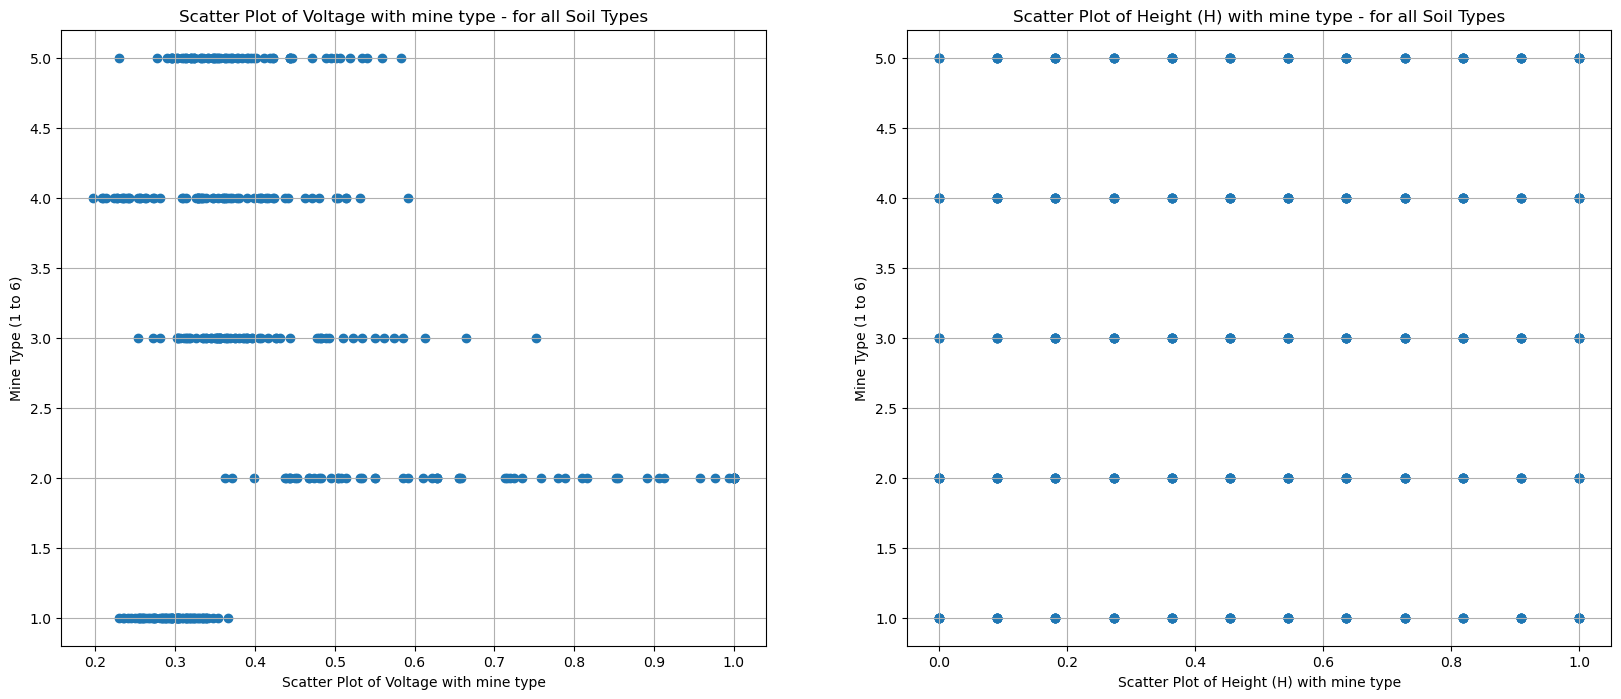

In [60]:
# Scatter Plots to visualize possible relationships which will help in model selection - VOLTAGE V and Height H
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

axes[0].scatter(mines['V'],mines['M'])
axes[0].set_title('Scatter Plot of Voltage with mine type - for all Soil Types')
axes[0].set_xlabel('Scatter Plot of Voltage with mine type')
axes[0].set_ylabel('Mine Type (1 to 6)')
axes[0].grid(True)

axes[1].scatter(mines['H'],mines['M'])
axes[1].set_title('Scatter Plot of Height (H) with mine type - for all Soil Types')
axes[1].set_xlabel('Scatter Plot of Height (H) with mine type')
axes[1].set_ylabel('Mine Type (1 to 6)')
axes[1].grid(True)

# Comments : Mine Type is a catagorical variable, Soil Type is a catagorical variable, 
#Voltage is a continous variable, Height is a continous variable.

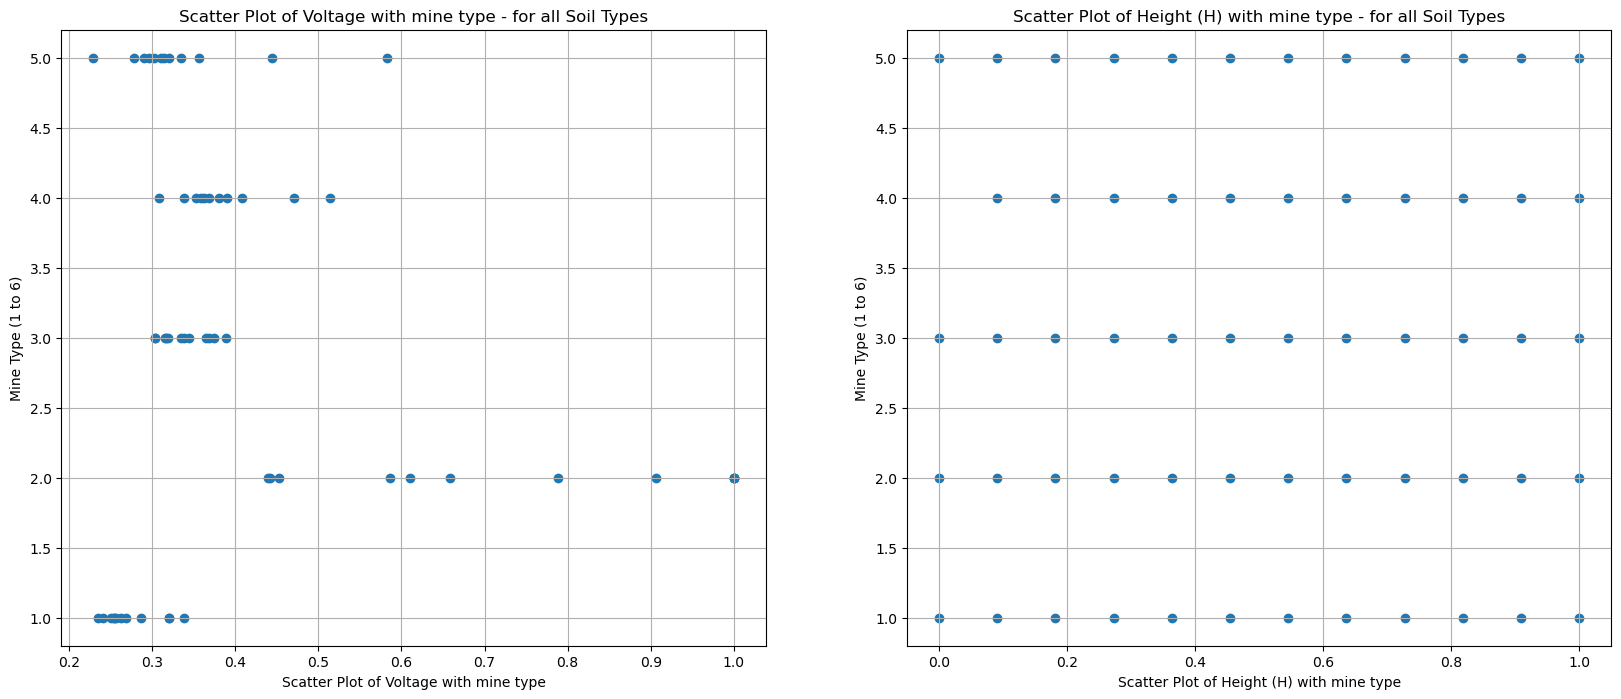

In [84]:
# Scatter Plots to visualize possible relationships which will help in model selection -
#VOLTAGE V and Height H - for  given soil type
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

axes[0].scatter(mines_s1['V'],mines_s1['M'])
axes[0].set_title('Scatter Plot of Voltage with mine type - for all Soil Types')
axes[0].set_xlabel('Scatter Plot of Voltage with mine type')
axes[0].set_ylabel('Mine Type (1 to 6)')
axes[0].grid(True)

axes[1].scatter(mines_s1['H'],mines_s1['M'])
axes[1].set_title('Scatter Plot of Height (H) with mine type - for all Soil Types')
axes[1].set_xlabel('Scatter Plot of Height (H) with mine type')
axes[1].set_ylabel('Mine Type (1 to 6)')
axes[1].grid(True)

# Comments : Mine Type is a catagorical variable, Soil Type is a catagorical variable, 
#Voltage is a continous variable, Height is a continous variable.

In [38]:
# using a Linear regression approach first 

# Fit the linear model
model = smf.ols('M ~ V + H + S', data=mines).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     2.491
Date:                Sat, 22 Jun 2024   Prob (F-statistic):             0.0601
Time:                        20:24:31   Log-Likelihood:                -593.81
No. Observations:                 338   AIC:                             1196.
Df Residuals:                     334   BIC:                             1211.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4090      0.294     11.592      0.0

In [40]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
fit=smf.glm('M ~ V + H + S', family =sm.families.Binomial(),data=mines).fit()
print(fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      M   No. Observations:                  338
Model:                            GLM   Df Residuals:                      334
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Sat, 22 Jun 2024   Deviance:                       49985.
Time:                        20:27:08   Pearson chi2:                 8.86e+18
No. Iterations:                     4   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.466e+16    1.4e+07   1.76e+09      0.0

C:\Users\nitin\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\nitin\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1056: RuntimeWarning: invalid value encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
C:\Users\nitin\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1057: RuntimeWarning: invalid value encountered in log
  n * np.log(1 - mu + 1e-20)) * var_weights


In [41]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
fit=smf.glm('M ~ V + H + S', family =sm.families.Poisson(),data=mines).fit()
print(fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      M   No. Observations:                  338
Model:                            GLM   Df Residuals:                      334
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -602.55
Date:                Sat, 22 Jun 2024   Deviance:                       240.90
Time:                        20:27:24   Pearson chi2:                     219.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01541
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2449      0.122     10.168      0.0

In [111]:
# trying logistic regression for this problem since it is a classification problem
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset

#data = pd.read_csv('Mines.dat', delimiter='\t', header=None, names=['V', 'H', 'S', 'M'])
#data = data.applymap(lambda x: float(x) if isinstance(x, str) else x)
data=mines

# Split the data into features (X) and target (y)
X = data[['V', 'H', 'S']].values
y = data['M'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the logistic regression model
model = LogisticRegression(multi_class='ovr', max_iter=10000)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the results
print("\n \n Coefficients: \n", model.coef_)
print("Intercept: ", model.intercept_)
print("R-squared: ", model.score(X_test, y_test))

Test Accuracy:  0.35294117647058826
Classification Report:
              precision    recall  f1-score   support

           1       0.23      0.91      0.37        11
           2       0.63      1.00      0.77        12
           3       1.00      0.06      0.12        16
           4       0.00      0.00      0.00        11
           5       0.25      0.06      0.09        18

    accuracy                           0.35        68
   macro avg       0.42      0.41      0.27        68
weighted avg       0.45      0.35      0.25        68

Confusion Matrix:
[[10  0  0  0  1]
 [ 0 12  0  0  0]
 [10  3  1  1  1]
 [ 9  1  0  0  1]
 [14  3  0  0  1]]

 
 Coefficients: 
 [[-3.75047798 -0.70033751 -0.20369685]
 [ 6.13446395  1.25893606 -0.29043162]
 [-0.48565684  0.20648488  0.1963797 ]
 [-2.1319623  -0.41258597 -0.08108154]
 [-1.12645811  0.06984073  0.46331615]]
Intercept:  [ 0.70307651 -4.6702586  -1.48947443 -0.23621394 -1.36960504]
R-squared:  0.35294117647058826


In [104]:
# Modeling selection attempt for this data set, Evaluating the acuracy of  other possible models.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df=mines

# Split the data into training and testing sets
X = df[['V', 'H', 'S']]
y = df['M']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the models
models = [
    RandomForestClassifier(n_estimators=100, random_state=42),
    LogisticRegression(max_iter=10000),
    DecisionTreeClassifier(random_state=42),
    SVC(kernel='rbf', probability=True),
    GradientBoostingClassifier(n_estimators=100, random_state=42)
]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    # Print the results
    #print("Coefficients: ", model.coef_)
    #print("Intercept: ", model.intercept_)
    #print("R-squared: ", model.score(X_test, y_test))
    print()  


Model: RandomForestClassifier
Accuracy: 0.529
Classification Report:
              precision    recall  f1-score   support

           1       0.62      0.91      0.74        11
           2       0.85      0.92      0.88        12
           3       0.43      0.38      0.40        16
           4       0.36      0.45      0.40        11
           5       0.36      0.22      0.28        18

    accuracy                           0.53        68
   macro avg       0.52      0.58      0.54        68
weighted avg       0.51      0.53      0.51        68

Confusion Matrix:
[[10  0  0  0  1]
 [ 0 11  0  1  0]
 [ 2  0  6  5  3]
 [ 1  1  1  5  3]
 [ 3  1  7  3  4]]

Model: LogisticRegression
Accuracy: 0.368
Classification Report:
              precision    recall  f1-score   support

           1       0.26      0.91      0.41        11
           2       0.71      1.00      0.83        12
           3       0.50      0.12      0.20        16
           4       0.00      0.00      0.00       

In [88]:
#using hyper parameter tuning to improve the gradient boosting classifier

import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Load the dataset
data = pd.read_csv('Mines.dat', delimiter='\t', header=None, names=['V', 'H', 'S', 'M'])

# Split the data into features (X) and target (y)
X = mines[['V', 'H', 'S']]
y = mines['M']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Gradient Boosting Classifier
gbc = GradientBoostingClassifier()

# Define the hyperparameter space
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Train the model with the best hyperparameters
gbc = GradientBoostingClassifier(**grid_search.best_params_)
gbc.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = gbc.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Best Parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 50}
Best Score:  0.5642731600780329
Test Accuracy:  0.5
Classification Report:
              precision    recall  f1-score   support

           1       0.58      0.64      0.61        11
           2       0.85      0.92      0.88        12
           3       0.47      0.44      0.45        16
           4       0.29      0.45      0.36        11
           5       0.36      0.22      0.28        18

    accuracy                           0.50        68
   macro avg       0.51      0.53      0.51        68
weighted avg       0.50      0.50      0.49        68

Confusion Matrix:
[[ 7  0  1  2  1]
 [ 0 11  0  1  0]
 [ 1  1  7  5  2]
 [ 1  1  0  5  4]
 [ 3  0  7  4  4]]
